In [1]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
import requests

In [2]:
data_kata = requests.get('https://raw.githubusercontent.com/algonacci/DataWarehouse/main/data_kata.txt').text
data_kata

'"Hii", "Hi", "Halo","Hallo","Hai", "Hello", "Hy", "Hyy", "Helo", "Halo dengan TravBot disini. Ada yang bisa aku bantu?", "Hellooww", "Haii, ada yang bisa aku bantu?", "Dah", "Dadah", "Bye", "Byee", "Good bye", "Selamat tinggal", "Sampai jumpa", "Bye!", "Dadahh!", "Good bye!", "Dahh, semoga harimu menyenangkan yaa!", "Sampai jumpa lagi!", "Thanks", "Thank you", "Terima kasih", "Makasih", "Terima kasih banyak.", "Senang bisa membantu!", "Kapan pun!", "Dengan senang hati.", "Maaf, aku ga ngerti yang kamu maksud.", "Tolong berikan saya informasi yang lebih jelas.", "Oops, kamu ga sengaja yaa?", "Kamu bisa apa?", "Kamu bisa ngapain?", "Kamu bisa bantu apa?", "Apa yang bisa kamu bantu?", "Tolong bantuin", "Tolong saya", "Help", "Halo, aku bisa bantu kamu untuk pertanyaan seputar rekomendasi Paket Wisata dan juga Asuransi Perjalanan.", "Silahkan tanyakan padaku soal rekomendasi Paket Wisata dan juga Asuransi Perjalanan yaa.", "Apa itu asuransi?", "Pengertian asuransi", "Definisi asuransi", "

In [3]:
kalimat = nltk.sent_tokenize(data_kata)
tabel_kata = []
kalimat

['"Hii", "Hi", "Halo","Hallo","Hai", "Hello", "Hy", "Hyy", "Helo", "Halo dengan TravBot disini.',
 'Ada yang bisa aku bantu?',
 '", "Hellooww", "Haii, ada yang bisa aku bantu?',
 '", "Dah", "Dadah", "Bye", "Byee", "Good bye", "Selamat tinggal", "Sampai jumpa", "Bye!',
 '", "Dadahh!',
 '", "Good bye!',
 '", "Dahh, semoga harimu menyenangkan yaa!',
 '", "Sampai jumpa lagi!',
 '", "Thanks", "Thank you", "Terima kasih", "Makasih", "Terima kasih banyak.',
 '", "Senang bisa membantu!',
 '", "Kapan pun!',
 '", "Dengan senang hati.',
 '", "Maaf, aku ga ngerti yang kamu maksud.',
 '", "Tolong berikan saya informasi yang lebih jelas.',
 '", "Oops, kamu ga sengaja yaa?',
 '", "Kamu bisa apa?',
 '", "Kamu bisa ngapain?',
 '", "Kamu bisa bantu apa?',
 '", "Apa yang bisa kamu bantu?',
 '", "Tolong bantuin", "Tolong saya", "Help", "Halo, aku bisa bantu kamu untuk pertanyaan seputar rekomendasi Paket Wisata dan juga Asuransi Perjalanan.',
 '", "Silahkan tanyakan padaku soal rekomendasi Paket Wisata da

In [5]:
for i in range(len(kalimat)):
    kata = re.sub('[^a-zA-Z]', ' ', kalimat[i])
    kata = kata.lower()
    kata = kata.split()
    kata = ' '.join(kata)
    tabel_kata.append(kata)

In [6]:
tabel_kata

['hii hi halo hallo hai hello hy hyy helo halo dengan travbot disini',
 'ada yang bisa aku bantu',
 'hellooww haii ada yang bisa aku bantu',
 'dah dadah bye byee good bye selamat tinggal sampai jumpa bye',
 'dadahh',
 'good bye',
 'dahh semoga harimu menyenangkan yaa',
 'sampai jumpa lagi',
 'thanks thank you terima kasih makasih terima kasih banyak',
 'senang bisa membantu',
 'kapan pun',
 'dengan senang hati',
 'maaf aku ga ngerti yang kamu maksud',
 'tolong berikan saya informasi yang lebih jelas',
 'oops kamu ga sengaja yaa',
 'kamu bisa apa',
 'kamu bisa ngapain',
 'kamu bisa bantu apa',
 'apa yang bisa kamu bantu',
 'tolong bantuin tolong saya help halo aku bisa bantu kamu untuk pertanyaan seputar rekomendasi paket wisata dan juga asuransi perjalanan',
 'silahkan tanyakan padaku soal rekomendasi paket wisata dan juga asuransi perjalanan yaa',
 'apa itu asuransi',
 'pengertian asuransi definisi asuransi penjelasan tentang asuransi jadi asuransi ini merupakan suatu kesepakatan anta

In [7]:
cv = CountVectorizer()
X = cv.fit_transform(tabel_kata).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
kata_kata = cv.get_feature_names()
bow = pd.DataFrame(X, columns=kata_kata)
pd.set_option("display.max_columns", None)
bow

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aca,ada,adalah,adira,admin,administrasi,afrika,aig,aja,ajukan,akan,aktif,aku,alamat,alkohol,amerika,anak,and,anda,anggota,antara,antibodi,apa,apabila,apakah,asia,asuransi,atas,atau,aturan,axa,ayah,bagaimana,bagi,bahkan,baik,bantu,bantuan,bantuin,banyak,barang,beberapa,bekerja,beli,belum,benua,bepergian,berada,berapa,berasal,berat,berbagai,berikan,berikutnya,berkunjung,berpenduduk,berpergian,beserta,biasanya,biaya,bisa,bisakah,buat,bye,byee,cair,cakupan,cara,cashless,cdc,centers,chubb,cocok,contoh,contohnya,control,cs,customer,dadah,dadahh,daerah,dah,dahh,dahulu,dalam,dan,dana,dapat,dari,data,definisi,demam,dengan,dewasa,di,dialami,dibantu,dibatalkan,dibeli,diberikan,dibutuhkan,diduga,digunakan,diindonesia,dijanjikan,dikenakan,dikunjungi,dilakukan,dilihat,diluar,dimana,dimiliki,dimudahkan,diperbolehkan,diperuntukkan,diri,disarankan,disease,disebabkan,disediakan,disengaja,disetujui,disini,ditawarkan,diutamakan,diwajibkan,dokter,domestik,dua,email,eropa,estimasi,fasilitas,fever,force,fungsinya,ga,gejala,gimana,good,group,hai,haii,hal,hallo,halo,hamil,hanya,harga,harganya,hari,harimu,harus,hati,health,hello,hellooww,helo,help,hepatitis,hi,hii,hilang,history,hubungi,hy,hyy,ibu,id,indonesia,infeksi,info,informasi,ingin,ini,insurance,insurtech,internasional,isu,itu,jadi,jaminan,jangan,jelas,jenis,jika,juga,jumpa,kali,kami,kamu,kapan,karena,kartu,kasih,ke,keadaan,keberangkatan,kecelakaan,keguguran,kehilangan,kejahatan,kekurangan,kelebihan,keluar,keluarga,kematian,kemudahan,kemudian,kenapa,kepada,kerja,kesepakatan,ketentuan,keterlambatan,ketika,ketka,keuntungan,keuntungannya,kisaran,kita,klaim,kompensasi,kondisi,kosong,kota,kredit,kuasa,kuning,lagi,lain,lainnya,lakukan,lama,lancar,langsung,later,lebih,lengkap,lewat,line,luar,lupa,maaf,majeure,maka,makasih,maksimal,maksud,manfaat,manusia,masih,masuk,mau,medis,melakukan,melalui,melampirkan,melihat,melindungi,memang,membandingkan,membantu,membatalkan,membeli,membentuk,memberikan,memberlakukan,membuat,memiliki,memilikinya,memperkirakan,menanggung,mencegah,mendaftar,mendapat,mendapatkan,mengabaikan,mengajukan,mengajukannya,mengalami,mengapa,mengganti,menghindari,menghitung,menghubungi,mengikuti,mengubah,mengunjungi,menjadi,menunggu,menurut,menyalahkan,menyebabkan,menyebutkan,menyediakan,menyenangkan,merupakan,meskipun,metode,mewajibkan,minggu,minimal,mohon,msig,mudah,mulai,murah,musibah,nama,negara,negaranya,negera,negeri,nekat,ngapain,ngerti,nomor,notifikasi,nyaman,obat,obatan,of,oleh,oops,orang,order,organization,pada,padaku,paket,para,paspor,pay,pembatalan,pembayaran,pembelian,pemberitahuan,pemilihan,pemilik,penerbangan,penerbitan,penerima,pengajuan,pengaruh,pengecualian,pengembalian,pengertian,pengganti,pengguna,pengisian,penjelasan,penyakit,penyebabnya,penyedia,pergantian,pergi,perjalan,perjalanan,perjalnan,perjanan,perlindungan,perlu,permilik,pertanyaan,perubahan,peruntukan,perusahaan,pihak,polis,preminya,prevention,produk,proses,pun,punya,refund,reimbursement,rekening,rekomendasi,rincian,risiko,rumah,saat,saja,sakit,salah,sama,sampai,sangat,saran,satu,saya,schegen,schengen,sebagai,sebelum,sebelumnya,sebuah,sedang,segera,sejak,sekaligus,sekitar,selama,selamat,seluruh,semoga,senang,sendiri,sengaja,seperti,seputar,service,seseorang,sesuai,setelah,setiap,siapa,sih,silahkan,simas,soal,spesifik,suatu,sudah,suka,syarat,tahun,tahunnya,tambahan,tanggal,tanpa,tanyakan,tapi,tau,telah,telepon,tempat,tentang,tentu,terakhir,terbaik,terbit,terdaftar,terdapat,terdiri,terima,terjadi,terjangkau,terlebih,terlibat,terlindungi,termasuk,teror,tersebut,tertera,tetap,thank,thanks,thypus,tidak,tinggal,tipoid,tolong,transaksi,travbot,travel,travellin,travens,traver,tubuh,tujuan,turis,turisnya,uang,ulang,umum,untuk,untungnya,usia,vaksin,vaksinasi,virus,visa,wajib,website,who,wisata,world,yaa,yaitu,yang,yellow,you,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

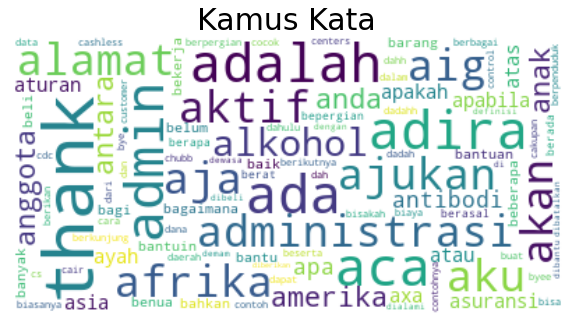

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Start with one review:
text = str(kata_kata).replace("'","")

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", prefer_horizontal=0.80).generate(text)
plt.figure(figsize=(10,50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Kamus Kata", fontsize=30)
plt.axis("off")
plt.show()

In [10]:
tabel_bow = pd.DataFrame(bow.sum())
pd.set_option("display.max_rows", None)
tabel_bow

,0
aca,2
ada,32
adalah,18
adira,2
admin,2
administrasi,2
afrika,24
aig,2
aja,2
ajukan,2


In [11]:
bow.sum().sum()

3550